In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.preprocessing import text,sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D,GlobalMaxPooling1D,MaxPooling1D
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
import tensorflow_text as text
import re    #for regex
import string
import re    #for regex
import nltk
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
train = pd.read_csv('IMDB Dataset.csv')

In [3]:
train

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


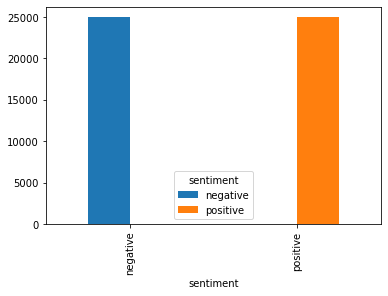

In [4]:
C = ['sentiment']

for i in C:
    ch = pd.crosstab(train[i], train['sentiment'])  
    ch.plot.bar()   
    plt.show() 

In [5]:
labeling = {
    'positive':1, 
    'negative':0
}

train['sentiment'] = train['sentiment'].apply(lambda x : labeling[x])

In [6]:
train.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
5,"Probably my all-time favorite movie, a story o...",1
6,I sure would like to see a resurrection of a u...,1
7,"This show was an amazing, fresh & innovative i...",0
8,Encouraged by the positive comments about this...,0
9,If you like original gut wrenching laughter yo...,1


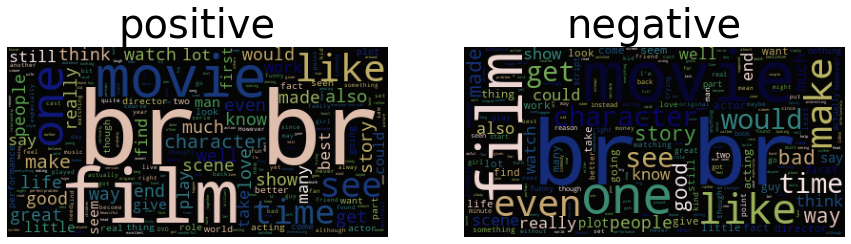

In [7]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
stopword = set(stopwords.words("english"))
subset=train[train.sentiment == 1]
text=subset.review.values
wc= WordCloud(background_color="black",max_words=500,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("positive", fontsize=40)
plt.imshow(wc.recolor(colormap= 'gist_earth'), alpha=0.98)


plt.subplot(122)
subset=train[train.sentiment == 0]
text=subset.review.values
wc= WordCloud(background_color="black",max_words=500,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("negative", fontsize=40)
plt.imshow(wc.recolor(colormap= 'gist_earth'), alpha=0.98)

In [11]:
clean = {
"aren't" : "are not",
"can't" : "can not",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"tryin'":"trying"
}

In [12]:
def clean_text(text):
    
    text = text.lower()
    text = re.sub(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', '', text) # clean url
    text = re.sub(r'#(\w+)', '', text)   # clean hashes
    text = re.sub(r'@(\w+)', '', text)   # clean @
    text = re.sub(r'<[^>]+>', '', text)  # clean tags
    text = re.sub(r'\d+', '', text)      # clean digits
    text = [clean[word] if word in clean else word for word in text.split()] 
    
   
    
    return text

In [14]:
train['review_clean'] = train['review'].apply(lambda x: clean_text(x))

In [61]:
x=train["review"]
y=train["sentiment"]
X_valid = train["review"]
y_valid = train["sentiment"]

In [62]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=1,shuffle=True)

In [63]:
X_train, X_val, y_train, y_val  = train_test_split(x, y, test_size=0.16, random_state=1) 

In [65]:
print('Number of reviews in the training set : {}'.format(len(X_train)))
print('Number of reviews in the validation set : {}'.format(len(X_valid)))
print('Number of reviews in the testing set : {}'.format(len(test_x)))

Number of reviews in the training set : 42000
Number of reviews in the validation set : 50000
Number of reviews in the testing set : 10000


In [44]:
bert_model_name = 'small_bert/bert_en_uncased_L-8_H-512_A-8'  

tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/2'
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'


In [52]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
preprocessor = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder_inputs = preprocessor(text_input)
encoder = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/2",
    trainable=True)
outputs = encoder(encoder_inputs)
pooled_output = outputs["pooled_output"]      # [batch_size, 768].
sequence_output = outputs["sequence_output"]  # [batch_size, seq_length, 768].

In [105]:

model = tf.keras.Sequential()
model.add(tf.keras.Model(text_input, pooled_output))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(1, activation=None, name='classifier'))


model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_6 (Functional)         (None, 512)               41373185  
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
classifier (Dense)           (None, 1)                 513       
Total params: 41,373,698
Trainable params: 41,373,697
Non-trainable params: 1
_________________________________________________________________


In [77]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [78]:
from official.nlp import optimization 
epochs = 5
steps_per_epoch = 625 #tf.data.experimental.cardinality(train_data).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [80]:
model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [83]:
history = model.fit(X_train, y_train,
                               validation_data=(X_valid, y_valid),
                               epochs=epochs)

Epoch 1/5
1313/1313 [==============================] - 502s 382ms/step - loss: 0.4002 - binary_accuracy: 0.8036 - val_loss: 0.2538 - val_binary_accuracy: 0.8956
Epoch 2/5
1313/1313 [==============================] - 499s 380ms/step - loss: 0.2563 - binary_accuracy: 0.8919 - val_loss: 0.1912 - val_binary_accuracy: 0.9300
Epoch 3/5
1313/1313 [==============================] - 503s 383ms/step - loss: 0.1895 - binary_accuracy: 0.9253 - val_loss: 0.1811 - val_binary_accuracy: 0.9338
Epoch 4/5
1313/1313 [==============================] - 501s 382ms/step - loss: 0.1823 - binary_accuracy: 0.9281 - val_loss: 0.1811 - val_binary_accuracy: 0.9338
Epoch 5/5
1313/1313 [==============================] - 504s 384ms/step - loss: 0.1834 - binary_accuracy: 0.9271 - val_loss: 0.1811 - val_binary_accuracy: 0.9338


In [86]:
loss, accuracy = model.evaluate(test_x, test_y)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

313/313 [==============================] - 43s 135ms/step - loss: 0.2861 - binary_accuracy: 0.8947
Loss: 0.28609445691108704
Accuracy: 0.8946999907493591


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


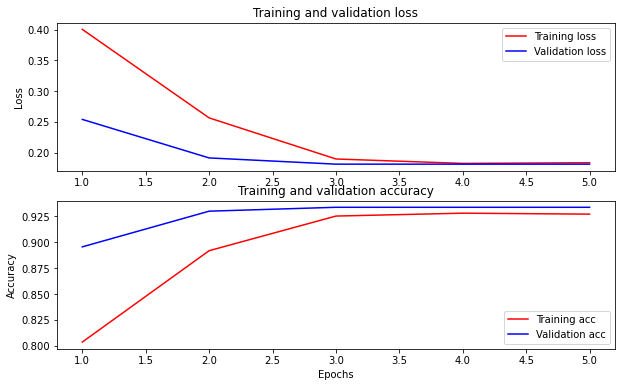

In [87]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [88]:
max_feature = 3000
tokenizer = tf.keras.preprocessing.text.Tokenizer(max_feature,
                                                  lower= True,
                                                  filters= '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                                  split = " ")

tokenizer.fit_on_texts(train_x)

In [89]:
sequences = tokenizer.texts_to_sequences(train_x)

In [90]:
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences,
                                                             maxlen = 300,
                                                             padding= "post")

In [124]:
layers =train["review"]

In [125]:
embedding = "https://tfhub.dev/google/nnlm-en-dim128/2"    
    
hub_layer = hub.KerasLayer(embedding,output_shape=[128], input_shape=[], dtype=tf.string, trainable=True)


In [154]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
model_2 = tf.keras.Sequential()
model_2.add(hub_layer)
model_2.add(tf.keras.layers.Reshape((1,128)))
model_2.add(LSTM(128))
model_2.add((Dropout(0.2)))
model_2.add(Dense(1,activation='sigmoid',name='classifier'))            

model_2.summary()


Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_11 (KerasLayer)  (None, 128)               124642688 
_________________________________________________________________
reshape_22 (Reshape)         (None, 1, 128)            0         
_________________________________________________________________
lstm_34 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
classifier (Dense)           (None, 1)                 129       
Total params: 124,774,401
Trainable params: 124,774,401
Non-trainable params: 0
_________________________________________________________________


In [172]:
model_2.compile(loss = "binary_crossentropy",
                 optimizer = 'adam',
                metrics=['accuracy'])

In [173]:
history = model_2.fit(X_train,y_train,
                 epochs=10,
                 validation_data=(X_valid, y_valid))

Epoch 1/10
1313/1313 [==============================] - 55s 40ms/step - loss: 0.0118 - accuracy: 0.9962 - precision: 0.9964 - recall: 0.9961 - val_loss: 0.1377 - val_accuracy: 0.9793 - val_precision: 0.9780 - val_recall: 0.9807
Epoch 2/10
1313/1313 [==============================] - 52s 39ms/step - loss: 0.0057 - accuracy: 0.9983 - precision: 0.9982 - recall: 0.9984 - val_loss: 0.1442 - val_accuracy: 0.9791 - val_precision: 0.9802 - val_recall: 0.9780
Epoch 3/10
1313/1313 [==============================] - 52s 39ms/step - loss: 0.0034 - accuracy: 0.9987 - precision: 0.9988 - recall: 0.9987 - val_loss: 0.1781 - val_accuracy: 0.9787 - val_precision: 0.9750 - val_recall: 0.9826
Epoch 4/10
1313/1313 [==============================] - 52s 40ms/step - loss: 0.0052 - accuracy: 0.9982 - precision: 0.9981 - recall: 0.9983 - val_loss: 0.1613 - val_accuracy: 0.9787 - val_precision: 0.9779 - val_recall: 0.9796
Epoch 5/10
1313/1313 [==============================] - 52s 40ms/step - loss: 0.0058 - a

In [1]:
loss, accuracy = model_2.evaluate(test_x, test_y)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

NameError: name 'model_2' is not defined

In [180]:
from sklearn.metrics import classification_report

y_pred = model_2.predict(test_x)
print(classification_report(test_y, y_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets